# Se importan las respectivas librerías

In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import folium as fol
%matplotlib inline

### Cargando datos de las bases de datos

In [9]:
dfm = pd.read_csv("CoordMunicipios.csv", encoding = "ISO-8859-1")
dfe = pd.read_csv("CoordEstados.csv", encoding = "ISO-8859-1")
df = pd.read_csv("200504COVID19MEXICO.csv", encoding = "ISO-8859-1")
df.head()

,FECHA_ACTUALIZACION,ID_REGISTRO,ORIGEN,SECTOR,ENTIDAD_UM,SEXO,ENTIDAD_NAC,ENTIDAD_RES,MUNICIPIO_RES,TIPO_PACIENTE,...,CARDIOVASCULAR,OBESIDAD,RENAL_CRONICA,TABAQUISMO,OTRO_CASO,RESULTADO,MIGRANTE,PAIS_NACIONALIDAD,PAIS_ORIGEN,UCI
0,04/05/2020,1ab4e5,2,3,25,2,25,25,6,2,...,2,1,2,2,2,1,99,MÃ©xico,99,2
1,04/05/2020,0cc140,2,3,15,1,28,15,20,1,...,2,2,2,2,1,1,99,MÃ©xico,99,97
2,04/05/2020,0e0689,2,3,27,1,27,27,4,1,...,2,2,2,2,2,1,99,MÃ©xico,99,97
3,04/05/2020,1b81dc,2,3,2,1,8,2,4,1,...,2,2,2,2,1,1,99,MÃ©xico,99,97
4,04/05/2020,0b7b4d,2,3,27,2,27,27,3,2,...,2,1,1,2,2,1,99,MÃ©xico,99,2


# Encontramos las siguientes columnas

In [ ]:
for i in df.columns:
    print(i)

# El Dataframe de Mexico=200504COVID19MEXICO.csv tiene la siguiente informacion

In [ ]:
df.info()

# Esta es la información de CoordMunicipios.csv-nos da información de los municipios

In [ ]:
dfm.info()

# Esta información es el dataframe de los estados

In [ ]:
dfe.info()

# Se procede a crear algunos DataFrames con los datos deseados

## El primero de ellos con variables categoricas para facilitar el entedimiento df_NEW

In [3]:
UCI=list(df["UCI"].replace({1:"SI",2:"NO",97:"NO APLICA", 99:"NO ESPECIFICADO"}))
SEXO=list(df["SEXO"].replace({1:"MUJER",2:"HOMBRE",99:"NO ESPECIFICADO"}))
ENTIDAD_RESIDENCIA=list(df["ENTIDAD_RES"])
MUNICIPIO_RESIDENCIA=list(df["MUNICIPIO_RES"])
CARDIOVASCULAR=list(df["CARDIOVASCULAR"].replace({1:"SI",2:"NO",98:"SE IGNORA"}))
OBESIDAD=list(df["OBESIDAD"].replace({1:"SI",2:"NO",98:"SE IGNORA"}))
RENAL_CRONICA=list(df["RENAL_CRONICA"].replace({1:"SI",2:"NO",98:"SE IGNORA"}))
TABAQUISMO=list(df["TABAQUISMO"].replace({1:"SI",2:"NO",98:"SE IGNORA"}))
RESULTADO=list(df["RESULTADO"].replace({1:"POSITIVO",2:"NEGATIVO",3:"PENDIENTE"}))
ENTIDAD_RESIDENCIA=list(df["ENTIDAD_RES"])
FECHA_DEF=list(df["FECHA_DEF"])

df_NEW = pd.DataFrame({"RESULTADO":RESULTADO, "ENTIDAD_RESIDENCIA":ENTIDAD_RESIDENCIA, "UCI":UCI, "FECHA_DEF":FECHA_DEF})
df_NEW.head(3)


,RESULTADO,ENTIDAD_RESIDENCIA,UCI,FECHA_DEF
0,POSITIVO,25,NO,10/04/2020
1,POSITIVO,15,NO APLICA,9999-99-99
2,POSITIVO,27,NO APLICA,9999-99-99


## El segundo de ellos se queda con las variables numericas para facilitar los calculos

In [ ]:
UCI=list(df["UCI"])
SEXO=list(df["SEXO"])
ENTIDAD_RESIDENCIA=list(df["ENTIDAD_RES"])
MUNICIPIO_RESIDENCIA=list(df["MUNICIPIO_RES"])
CARDIOVASCULAR=list(df["CARDIOVASCULAR"])
OBESIDAD=list(df["OBESIDAD"])
#RENAL_CRONICA=list(df["RENAL_CRONICA"])
TABAQUISMO=list(df["TABAQUISMO"])
RESULTADO=list(df["RESULTADO"])
EDAD=list(df["EDAD"])
FECHA_DEF=list(df["FECHA_DEF"])
HIPERTENSION=list(df["HIPERTENSION"])


df_NEW1 = pd.DataFrame({"Clave Municipio":MUNICIPIO_RESIDENCIA,"RESULTADO":RESULTADO,"ENTIDAD_RESIDENCIA":ENTIDAD_RESIDENCIA, "FECHA_DEF":FECHA_DEF})
df_NEW1.head(3)

# ORGANIZAR -INICIO

In [ ]:
#Este analisis nos da una muestra de las personas que tienen el virus.

df_NEW1.groupby(["RESULTADO", "HIPERTENSION"]).count()

# Grafica por sectores 
# tipo_gol = 'NEGATIVO', 'PENDIENTE', 'POSITIVO'
# goles = [61993,13143,24905]  
# colores = ['magenta','green','red']
# plt.pie(goles, labels = tipo_gol, colors=colores ,shadow = True, explode = (0.0, 0.1, 0.5), autopct = '%1.1f%%')  
# plt.show() 

In [ ]:
df_NEW.groupby(["SEXO","RESULTADO"]).count()

#CANTIDAD DE POSITIVOS POR ENFERMEDAD
#CANTIDAD DE POSTIVIOS DEPENDIENDO DE SU RESIDENCIA
#CANTIDAD DE POSITIVOS DEPENDIENDO DEL SEXO

In [ ]:
df_NEW1.info()
df_NEW1["MUNICIPIO_RESIDENCIA"] = df_NEW1["MUNICIPIO_RESIDENCIA"].astype("float64")
df_NEW1.dtypes

In [ ]:
#1	SI 
#2	NO 
#98	SE IGNORA


sns.countplot(df_NEW1['TABAQUISMO'])
plt.show()


In [ ]:
sns.countplot(df_NEW1['RESULTADO'])
plt.show()

In [ ]:
ax=df_NEW.groupby(["RESULTADO", "SEXO"])["CARDIOVASCULAR"].size().unstack().plot.bar()
plt.xlabel('Resultado Prueba COVID_19')
plt.show()

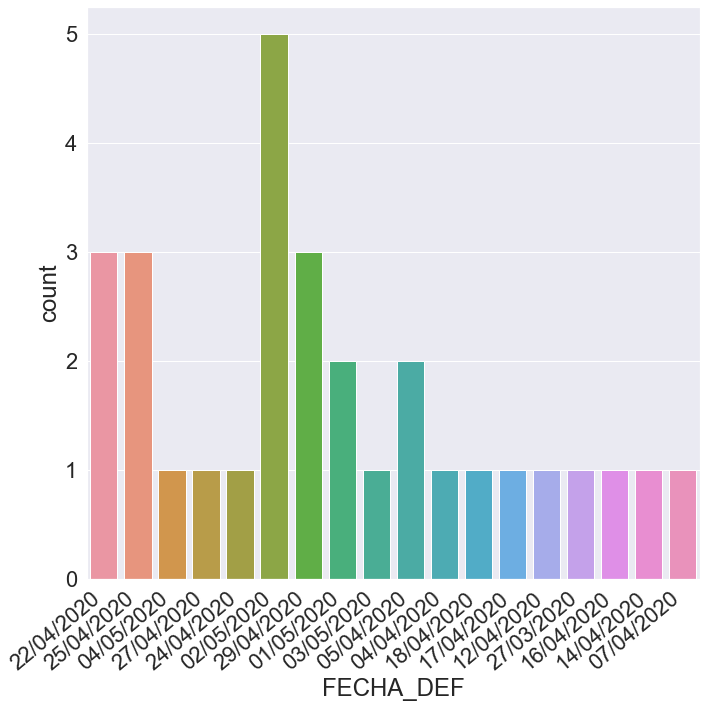

In [12]:
# cantidad de fallecidos en los ultimos 30 días 
df_pos_fallecidos=df[(df["FECHA_DEF"]!="9999-99-99") & (df["RESULTADO"]==1)]
df_pos_fallecidos
fig, ax = plt.subplots(figsize=(10,10))
df_ultimo_mes = df_pos_fallecidos.tail(30)
df_ultimo_mes
sns.countplot(df_ultimo_mes['FECHA_DEF'], sns.set(font_scale=1))
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right", )
plt.tight_layout()

# ORGANIZAR- FINAL

# PARTE 2

## 1.	Número de personas que han dado positivo en la prueba COVID-19

## 2.	Número de personas que han dado negativo

### 24.905 personas infectadas

### 61.993 personas resultado negativo

In [ ]:
df_NEW.groupby(["RESULTADO"]).count()

## 3.	Número de personas en UCI 

### 2.250 PERSONAS SE ECNUENTRAN EN UCI

In [ ]:
df_NEW.groupby(["UCI"]).size()

## 4.	Número de personas que han fallecido 

### PERSONAS TOTALES EN LA MUESTRA 100.041

In [ ]:
len(df_NEW["FECHA_DEF"])

### PERSONAS QUE ESTAN VIVAS #96.041

In [ ]:
len(df_NEW1[df_NEW1["FECHA_DEF"]=="9999-99-99"])

## 100.041-96.461=3.580 personas han fallecido

## 5.	Número de personas que han dado positivo y sin enfermedades 
### Creamos una nueva columna con las sumas de todas las enfermedades

In [49]:

df["SANOS"]=df.iloc[:,19:29].sum(axis=1)

#SI la suma es igual a 20 es sano. (2=No tiene enfermedad)
df.loc[(df["SANOS"]==20),"SANOS"]="Sano"
#Si la suma es diferente de 20 , tiene alguna de las enfermedades.
df.loc[(df["SANOS"]!="Sano"),"SANOS"]="Enfermo"


# EL numero de personas que estan sanas y dieron postivo en la prueba de Covid es 11.719 personas

In [50]:
df.groupby(["RESULTADO", "SANOS"]).size()

RESULTADO  SANOS  
1          Enfermo    13186
           Sano       11719
2          Enfermo    27253
           Sano       34740
3          Enfermo     6159
           Sano        6984
dtype: int64

In [ ]:
#6.Número de personas que han fallecido (que han dado positivo) y sin enfermedades
a=df["FECHA_DEF"]=="9999-99-99"
a=list(a)
df["FALLECIDOS true= vivos"]=a
df

df.groupby(["FALLECIDOS true= vivos", "SANOS","RESULTADO"]).size()

#El numero de personas que dieron positivo en la prueba , estaban sanos y fallecieron son 501.

In [ ]:
#7.Tiempo promedio entre la fecha de síntomas y la fecha de defunción de los que han dado positivo

#pandas.to_datetime(param, format="")

#Personas que han fallecido y dieron positivo en la prueba
df_filtrado=df[~(df["FECHA_DEF"]=="9999-99-99") & (df["RESULTADO"]==1)]

#Se transforman los datos de fechas en formato datetime %d/%m/%Y

df_filtrado['FECHA SINTOMAS FORMATO FECHA'] = pd.to_datetime(df_filtrado['FECHA_SINTOMAS'],format="%d/%m/%Y").copy()
df_filtrado['FECHA DEF FORMATO FECHA'] = pd.to_datetime(df_filtrado['FECHA_DEF'],format="%d/%m/%Y")

#Se crea un nuevo dataframe con los columnas que queremos.
df_fechas_correctas=df_filtrado[['FECHA SINTOMAS FORMATO FECHA','FECHA DEF FORMATO FECHA', "RESULTADO"]]

#Se restan los dias de la fecha de fallecimiento y la fecha que presentaron sintomas.
df_fechas_correctas["RESTA DIAS"]= df_fechas_correctas['FECHA DEF FORMATO FECHA'].sub(df_fechas_correctas['FECHA SINTOMAS FORMATO FECHA'], axis=0)
df_fechas_correctas



In [ ]:
#La media de las personas que dan resultado positivo y han fallecido es de 10 dias entre que presentan sintomas y su fallecimiento.
df_fechas_correctas["RESTA DIAS"].mean()

In [ ]:
#8.	¿Cuál es la enfermedad con mas prevalencia en los pacientes que dan positivo?
df4 = df.iloc[:,19:31]
df_enfermedades=df4[df4["RESULTADO"]==1]
df_final_enfermedades1 = df_enfermedades.drop(['OTRA_COM','OTRO_CASO'], axis=1)
for i in df_final_enfermedades1.columns:
    x=df_final_enfermedades1[i].sum()
    print(i +" "+str(x))
    
#La enfermedad con mas prevalencia en los pacientes que dan positivo es Hipertension y la que menos es RENAL_CRONICA

In [ ]:
#10.	¿Es la misma cantidad de pacientes entubados que los que se encuentran en UCI?
df.groupby(["UCI"]).size()

In [ ]:
df.groupby(["INTUBADO"]).size()

#La cantidad de personas que estan en UCI son 2250 y las personas que estan intubadas son 2001

In [ ]:
dfm.head()

# Parte 2 Gráficas

In [13]:
#Se cambia de nombre las columnas de df para que queden igual a las de dfm
df= df.rename(columns={"ENTIDAD_RES":"Clave Estado", "MUNICIPIO_RES":"Clave Municipio"})
df_names=pd.merge(df, dfm , on=["Clave Estado", "Clave Municipio"])
df_names

,FECHA_ACTUALIZACION,ID_REGISTRO,ORIGEN,SECTOR,ENTIDAD_UM,SEXO,ENTIDAD_NAC,Clave Estado,Clave Municipio,TIPO_PACIENTE,...,RESULTADO,MIGRANTE,PAIS_NACIONALIDAD,PAIS_ORIGEN,UCI,Estado,Municipio,Latitud,Longitud,Error
0,04/05/2020,1ab4e5,2,3,25,2,25,25,6,2,...,1,99,MÃ©xico,99,2,Sinaloa,Culiacán,24.516165,-106.7966333,NaN
1,04/05/2020,1448c7,2,3,25,2,99,25,6,2,...,1,2,Estados Unidos de AmÃ©rica,99,2,Sinaloa,Culiacán,24.516165,-106.7966333,NaN
2,04/05/2020,73442,2,3,25,1,25,25,6,2,...,1,99,MÃ©xico,99,2,Sinaloa,Culiacán,24.516165,-106.7966333,NaN
3,04/05/2020,07589e,2,3,25,2,9,25,6,1,...,1,99,MÃ©xico,99,97,Sinaloa,Culiacán,24.516165,-106.7966333,NaN
4,04/05/2020,07eb77,2,3,25,2,25,25,6,2,...,1,99,MÃ©xico,99,2,Sinaloa,Culiacán,24.516165,-106.7966333,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100035,04/05/2020,10c6fe,1,12,30,2,20,20,211,2,...,3,99,MÃ©xico,99,2,Oaxaca,San Juan Ozolotepec,17.436828,-97.76369317,NaN
100036,04/05/2020,06bad9,1,12,21,2,21,21,129,2,...,3,99,MÃ©xico,99,2,Puebla,San José Miahuatlán,19.248655,-97.71989656,NaN
100037,04/05/2020,12ceca,1,12,9,2,15,20,175,2,...,3,99,MÃ©xico,99,2,Oaxaca,San Juan Bautista Atatlahuca,16.988091,-96.71524246,NaN
100038,04/05/2020,10d202,2,12,9,2,21,21,9,2,...,3,99,MÃ©xico,99,1,Puebla,Ahuehuetitla,20.056549,-98.13697827,NaN


# 1.Número de personas que dan positivo por estado

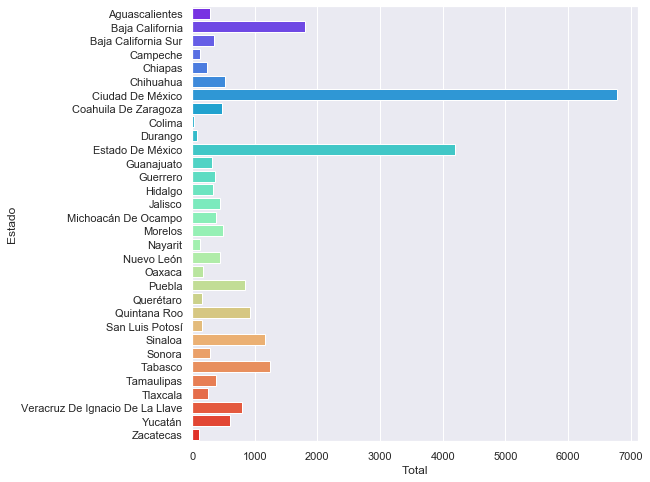

In [14]:
# Se creo un filtro y un nuevo data frame para entender mejor la grafica.
RESULTADO=list(df_names["RESULTADO"].replace({1:"POSITIVO",2:"NEGATIVO",3:"PENDIENTE"}))
ESTADO=list(df_names["Estado"])
df_NEW = pd.DataFrame({"Estado":ESTADO, "RESULTADO":RESULTADO})
personas_resultado_pos=df_NEW[df_NEW["RESULTADO"]=="POSITIVO"]


dfg1 = personas_resultado_pos.groupby(["Estado"]).size().reset_index(name='Total')
fig, ax = plt.subplots(figsize=(8,8))
sns.barplot(x="Total", y="Estado",  data=dfg1, palette="rainbow", orient="h",)
plt.show()


# 2.Número de personas que dan negativo por estado

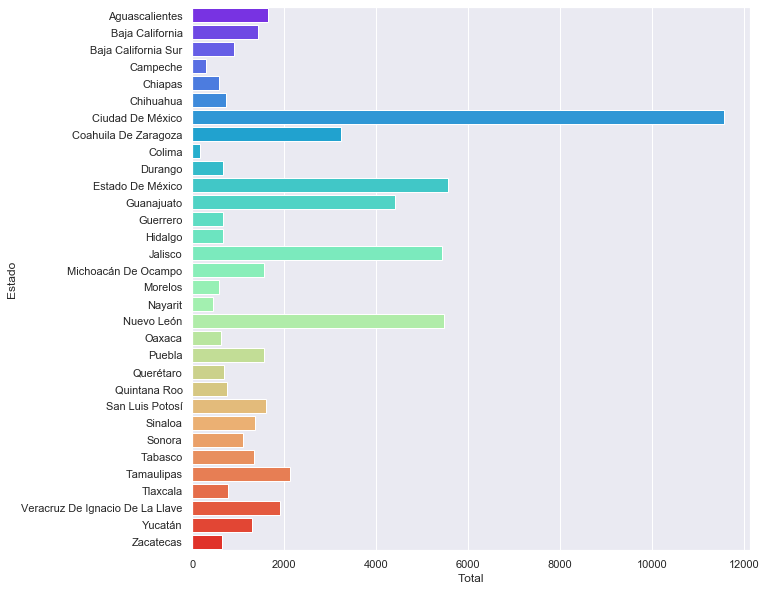

In [15]:
personas_resultado_neg=df_NEW[df_NEW["RESULTADO"]=="NEGATIVO"]

dfg2 = personas_resultado_neg.groupby(["Estado"]).size().reset_index(name='Total')
fig, ax = plt.subplots(figsize=(10,10))
sns.barplot(x="Total", y="Estado",  data=dfg2, palette="rainbow")
plt.show()

# 3.El municipio de cada estado con más positivos

In [16]:
df_pos=df_names[df_names["RESULTADO"]==1]
df_pos=df_names.groupby(["Estado", "Municipio"],as_index=False)["RESULTADO"].count()

# lista_unicos=df_pos["Estado"].unique()
# for i in lista_unicos:
#     print(df_pos[df_pos["Estado"]==i].max())

In [17]:

df_pos=df_names[df_names["RESULTADO"]==1]
df_pos=df_pos.groupby(["Estado","Municipio"],as_index=False)["RESULTADO"].count()
df_pos

lista_unicos=df_pos["Estado"].unique()
lista_mun=[]
lista_values=[]

for i in lista_unicos:
    lista_mun.append(df_pos[df_pos["Estado"]==i]["Municipio"].max())
    lista_values.append(df_pos[df_pos["Estado"]==i]["RESULTADO"].max())

df_max=pd.DataFrame({"Estado": lista_unicos, "Municipio": lista_mun,"Positivos": lista_values})
# df_max


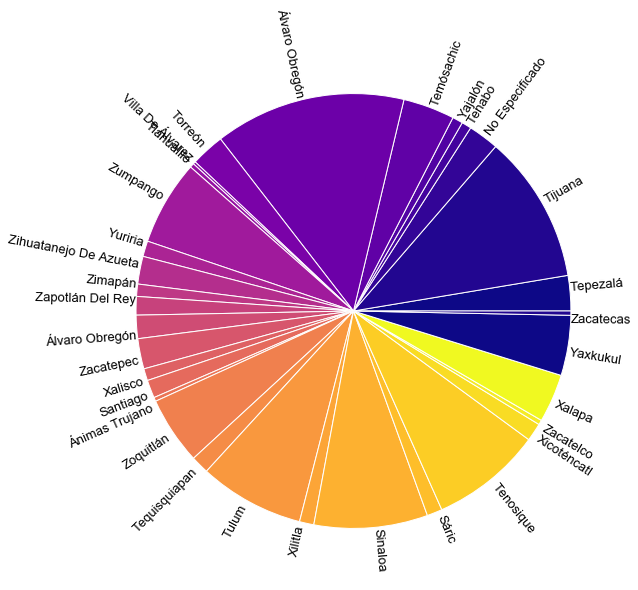

In [37]:
fig, ax = plt.subplots(figsize=(10,10))
municipios = lista_mun
positivos = lista_values  

plt.rcParams.update({'font.size': 10})
colores = plt.cm.plasma(np.linspace(0.,1.,30))
plt.pie( positivos ,labels = municipios,labeldistance = 1,rotatelabels = 270,colors = colores,textprops=dict(color="black", size = 13),wedgeprops = {'linewidth': 1},shadow = False) 
# ax.legend(municipios,title="Municipios",loc="center left",bbox_to_anchor=(1, 0, 0.5, 1))
# ax.set_title("CITIES WITH HIGHEST COVID+ RATIO", weight = "bold")
plt.show()


# 4.Distribución de las edades que han dado positivo entre hombres y mujeres

In [38]:
SEXO=list(df["SEXO"].replace({1:"MUJER",2:"HOMBRE",99:"NO ESPECIFICADO"}))
RESULTADO=list(df["RESULTADO"].replace({1:"POSITIVO",2:"NEGATIVO",3:"PENDIENTE"}))
EDAD=list(df["EDAD"])
df_4 = pd.DataFrame({"Sexo":SEXO, "Edad":EDAD,"RESULTADO":RESULTADO, })
df_4_pos=df_4[df_4["RESULTADO"]=="POSITIVO"]

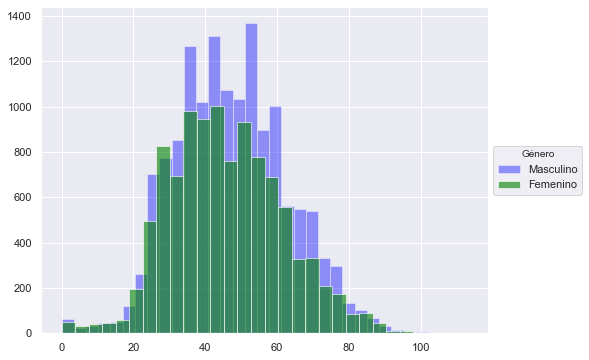

In [43]:
sex0=["Masculino","Femenino"]
fig, ax = plt.subplots(figsize=(8,6))
plt.hist(df_4_pos[df_4_pos["Sexo"]=="HOMBRE"]["Edad"], bins=30, alpha= 0.4, color="Blue")
plt.hist(df_4_pos[df_4_pos["Sexo"]=="MUJER"]["Edad"], bins=30,alpha= 0.6,  color="Green")
ax.legend(sex0,title="Género",loc="center left",bbox_to_anchor=(1, 0, 0.5, 1))

plt.show()

# 5.	Distribución de las edades que han dado negativo entre hombres y mujeres

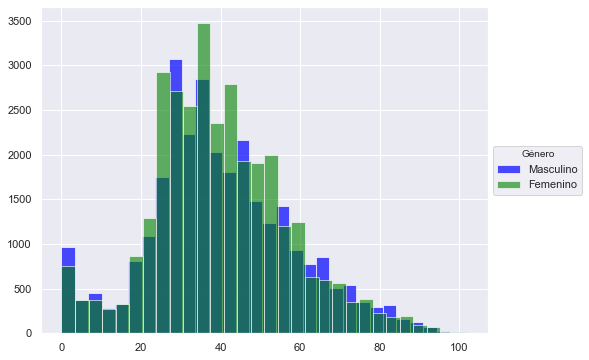

In [44]:
SEXO=list(df["SEXO"].replace({1:"MUJER",2:"HOMBRE",99:"NO ESPECIFICADO"}))
RESULTADO=list(df["RESULTADO"].replace({1:"POSITIVO",2:"NEGATIVO",3:"PENDIENTE"}))
EDAD=list(df["EDAD"])
df_5 = pd.DataFrame({"Sexo":SEXO, "Edad":EDAD,"RESULTADO":RESULTADO})
df_5_pos=df_5[df_5["RESULTADO"]=="NEGATIVO"]

fig, ax = plt.subplots(figsize=(8,6))
plt.hist(df_5_pos[df_5_pos["Sexo"]=="HOMBRE"]["Edad"], bins=30, alpha= 0.7, color="Blue")
plt.hist(df_5_pos[df_5_pos["Sexo"]=="MUJER"]["Edad"], bins=30,alpha= 0.6,  color="Green")
ax.legend(sex0,title="Género",loc="center left",bbox_to_anchor=(1, 0, 0.5, 1))

plt.show()

# 6.	Distribución de las personas que han fallecido entre hombres y mujeres

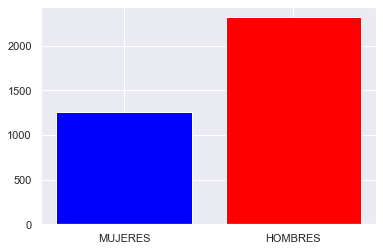

In [45]:
df_falle=df[df["FECHA_DEF"]!="9999-99-99"]
df_falle
MUJERES_FALLECIDAS=len(df_falle[(df_falle["SEXO"]==1)&(df_falle["FECHA_DEF"]!="9999-99-99")])
HOMBRES_FALLECIDOS=len(df_falle[(df_falle["SEXO"]==2)&(df_falle["FECHA_DEF"]!="9999-99-99")])
fig, ax = plt.subplots()
etiquetas=["MUJERES","HOMBRES"]
valores=[MUJERES_FALLECIDAS,HOMBRES_FALLECIDOS]
plt.bar(etiquetas,valores, color=["blue","red"])
plt.show()

# 7.	En un mapa se agregaron pop-up text con el número de positivos para cada estado

In [46]:
COORDENADAS= df_names[["Estado","Municipio","Latitud", "Longitud", "RESULTADO"]]
COORDENADAS1=COORDENADAS[COORDENADAS["RESULTADO"]==1]
COORDENADAS2=COORDENADAS1.groupby(["Estado"], as_index=False)["RESULTADO"].count()
COORDENADAS3=COORDENADAS2.merge(dfe, left_on='Estado', right_on='Estado')
COORDENADAS3.head(3)

,Estado,RESULTADO,Clave Estado,Latitud,Longitud,Error
0,Aguascalientes,286,1,21.8818,-102.291,ok
1,Baja California,1808,2,29.95,-115.116667,ok
2,Baja California Sur,344,3,25.625057,-111.700684,ok


In [103]:
MEX_map = fol.Map(location=[21.8818, -102.291], zoom_start=5)
# Inicializamos un feature group para los incidentes en el dataframe

COVID= fol.map.FeatureGroup()
for index, row in COORDENADAS3.iterrows(): 
    COVID.add_child(
            fol.CircleMarker(location=[float(row["Latitud"]),float(row["Longitud"])],
            radius=6, # difine el tamaño de los circulos
            fill=True,
            popup= "Positivos: " + str(row["RESULTADO"]),                 
            fill_opacity=0.4))
        
    
    MEX_map.add_child(COVID)

MEX_map


# 8.	Crea un choromap para ver por colores el número de positivos para cada estado.

In [47]:
COORDENADAS3["Estado"]=COORDENADAS3["Estado"].replace({"Ciudad De México":"CDMX","Estado De México":"Estado De Mexico", "Michoacán De Ocampo":"Michoacan De Ocampo", "Nuevo León":"Nuevo Leon","Querétaro":"Queretaro", "San Luis Potosí":"San Luis Potosi","Yucatán":"Yucatan",})
COORDENADAS3.head(3)

,Estado,RESULTADO,Clave Estado,Latitud,Longitud,Error
0,Aguascalientes,286,1,21.8818,-102.291,ok
1,Baja California,1808,2,29.95,-115.116667,ok
2,Baja California Sur,344,3,25.625057,-111.700684,ok


In [98]:
world_geo = r'mexico.json' # geojson


# SE CREA UN MAPA DE MEXICO
MEX_map = fol.Map(location=[21.8818, -102.291], zoom_start=5)


In [99]:

MEX_map.choropleth(
    geo_data=world_geo,
    data=COORDENADAS3,
    columns=['Estado', 'RESULTADO'],
    key_on='feature.properties.name',
     fill_color='Reds', 
     fill_opacity=0.7, 
     line_opacity=0.2,
     legend_name='COVID-19 por Estado'
)
MEX_map

In [86]:
import json

f = open("mexico.json", "r")
content = f.read()
jsondecoded = json.loads(content)
# jsondecoded
#'properties' 'features' 

In [90]:
for entity in jsondecoded["features"]:
    entityName = entity['properties']
    print(entityName)

{'name': 'Baja California'}
{'name': 'Baja California Sur'}
{'name': 'Coahuila De Zaragoza'}
{'name': 'Chihuahua'}
{'name': 'Durango'}
{'name': 'Sinaloa'}
{'name': 'Sonora'}
{'name': 'Zacatecas'}
{'name': 'Nuevo Leon'}
{'name': 'San Luis Potosi'}
{'name': 'Tamaulipas'}
{'name': 'Aguascalientes'}
{'name': 'Colima'}
{'name': 'Jalisco'}
{'name': 'Michoacan De Ocampo'}
{'name': 'Nayarit'}
{'name': 'Campeche'}
{'name': 'Oaxaca'}
{'name': 'Puebla'}
{'name': 'Tabasco'}
{'name': 'Tlaxcala'}
{'name': 'CDMX'}
{'name': 'Guanajuato'}
{'name': 'Guerrero'}
{'name': 'Hidalgo'}
{'name': 'Estado De Mexico'}
{'name': 'Morelos'}
{'name': 'Queretaro'}
{'name': 'Veracruz De Ignacio De La Llave'}
{'name': 'Chiapas'}
{'name': 'Quintana Roo'}
{'name': 'Yucatan'}


['name']